In [29]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.preprocessing.image import img_to_array,load_img,ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt

In [4]:
img_gen = ImageDataGenerator(rotation_range=0.3,
                        width_shift_range=0.1,height_shift_range=0.1,
                        zoom_range=0.2,shear_range=0.2,
                        rescale=1/255,horizontal_flip=True)

In [18]:
train = img_gen.flow_from_directory(r'/content/drive/MyDrive/Messy&Clean/train', target_size=(150,150), class_mode='binary')
# test = img_gen.flow_from_directory(r'/content/drive/MyDrive/Messy&Clean/test', target_size=(150,150), class_mode='binary')
val = img_gen.flow_from_directory(r'/content/drive/MyDrive/Messy&Clean/val', target_size=(150,150), class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [23]:
# model  = Sequential()
base = MobileNetV2(input_shape=(150,150,3), include_top=False)

for layer in base.layers:
  layer.trainable = False
head = base.output
head = Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu')(head)
head = MaxPooling2D(2)(head)
# head = Conv2D(64, (3,3), input_shape=(150,150,3), activation='relu')(head)
# head = MaxPooling2D(2)(head)
head = Dropout(0.25)(head)
head = Flatten()(head)
head = Dense(1, activation='sigmoid')(head)

model = Model(inputs = base.input, outputs = head)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [24]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
result = model.fit(train,
          epochs=50,
          batch_size=30,
          verbose=2,
          validation_data=val)

Epoch 1/50
6/6 - 9s - loss: 2.1759 - accuracy: 0.5885 - val_loss: 0.8664 - val_accuracy: 0.6000
Epoch 2/50
6/6 - 5s - loss: 0.6406 - accuracy: 0.7448 - val_loss: 0.7104 - val_accuracy: 0.8000
Epoch 3/50
6/6 - 5s - loss: 0.3340 - accuracy: 0.8542 - val_loss: 0.3218 - val_accuracy: 0.8000
Epoch 4/50
6/6 - 5s - loss: 0.2292 - accuracy: 0.9323 - val_loss: 0.3568 - val_accuracy: 0.8500
Epoch 5/50
6/6 - 5s - loss: 0.1779 - accuracy: 0.9479 - val_loss: 0.2486 - val_accuracy: 0.9000
Epoch 6/50
6/6 - 5s - loss: 0.1432 - accuracy: 0.9427 - val_loss: 0.1896 - val_accuracy: 0.9000
Epoch 7/50
6/6 - 5s - loss: 0.1372 - accuracy: 0.9531 - val_loss: 0.3056 - val_accuracy: 0.9000
Epoch 8/50
6/6 - 5s - loss: 0.0904 - accuracy: 0.9740 - val_loss: 0.1432 - val_accuracy: 0.9500
Epoch 9/50
6/6 - 5s - loss: 0.0813 - accuracy: 0.9635 - val_loss: 0.1235 - val_accuracy: 0.9500
Epoch 10/50
6/6 - 5s - loss: 0.0968 - accuracy: 0.9635 - val_loss: 0.4074 - val_accuracy: 0.8500
Epoch 11/50
6/6 - 5s - loss: 0.1015 - a

In [28]:
result.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

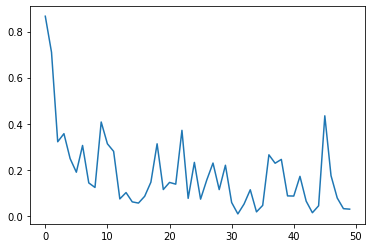

In [32]:
plt.plot(result.history.get('val_loss'))

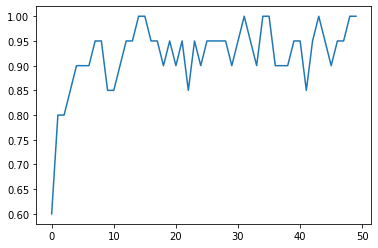

In [36]:
plt.plot(result.history['val_accuracy'])

In [37]:
train.class_indices

{'clean': 0, 'messy': 1}

In [50]:
test = load_img(r'/content/drive/MyDrive/Messy&Clean/test/6.png', target_size=(150,150,3))

In [51]:
arr = img_to_array(test)
arr.shape
arr = arr.reshape(1,150,150,3)

In [52]:
model.predict(arr)

array([[1.2071926e-07]], dtype=float32)